# Stock Market Price prediction

In [1]:
#packages

import pandas as pd
import pytz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score


## Downloading stock price data

In [2]:
import yfinance as yf

In [3]:
ticker= yf.Ticker("AAPL")

In [4]:
df= ticker.history(period= "10y")
#set period of data collected

In [5]:
#Show data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-10-17 00:00:00-04:00,21.642740,21.975705,21.489575,21.680475,272718800,0.0,0.0
2014-10-20 00:00:00-04:00,21.824758,22.188800,21.802561,22.144405,310069200,0.0,0.0
2014-10-21 00:00:00-04:00,22.868056,22.868056,22.479597,22.745970,378495600,0.0,0.0
2014-10-22 00:00:00-04:00,22.828100,23.110011,22.774826,22.861397,273052400,0.0,0.0
2014-10-23 00:00:00-04:00,23.103352,23.318670,23.003461,23.269835,284298800,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-11 00:00:00-04:00,229.300003,229.410004,227.339996,227.550003,31759200,0.0,0.0
2024-10-14 00:00:00-04:00,228.699997,231.729996,228.600006,231.300003,39882100,0.0,0.0
2024-10-15 00:00:00-04:00,233.610001,237.490005,232.369995,233.850006,64751400,0.0,0.0


## Cleaning and visualising price data.

Convert timezone to Harare, Zimbabwe time.

In [6]:
df=df.tz_convert("africa/harare")

In [7]:
del df["Dividends"]
del df["Stock Splits"]

In [8]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-10-17 06:00:00+02:00,21.642740,21.975705,21.489575,21.680475,272718800
2014-10-20 06:00:00+02:00,21.824758,22.188800,21.802561,22.144405,310069200
2014-10-21 06:00:00+02:00,22.868056,22.868056,22.479597,22.745970,378495600
2014-10-22 06:00:00+02:00,22.828100,23.110011,22.774826,22.861397,273052400
2014-10-23 06:00:00+02:00,23.103352,23.318670,23.003461,23.269835,284298800
...,...,...,...,...,...
2024-10-11 06:00:00+02:00,229.300003,229.410004,227.339996,227.550003,31759200
2024-10-14 06:00:00+02:00,228.699997,231.729996,228.600006,231.300003,39882100
2024-10-15 06:00:00+02:00,233.610001,237.490005,232.369995,233.850006,64751400


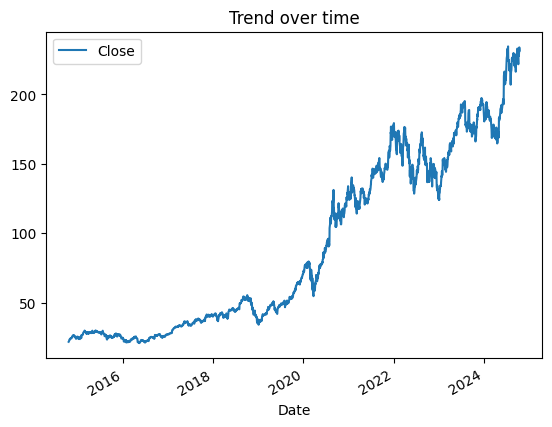

In [9]:
df.plot.line(y="Close", title= "Trend over time", use_index=True);

## Setting up Prediction.

In [10]:
#creating a next day column and the closing price
df["Next Day"]= df["Close"].shift(-1)

In [11]:
df["Target"] = (df["Next Day"] >df["Close"]).astype(int)

In [12]:
df

,Open,High,Low,Close,Volume,Next Day,Target
Date,,,,,,,
2014-10-17 06:00:00+02:00,21.642740,21.975705,21.489575,21.680475,272718800,22.144405,1
2014-10-20 06:00:00+02:00,21.824758,22.188800,21.802561,22.144405,310069200,22.745970,1
2014-10-21 06:00:00+02:00,22.868056,22.868056,22.479597,22.745970,378495600,22.861397,1
2014-10-22 06:00:00+02:00,22.828100,23.110011,22.774826,22.861397,273052400,23.269835,1
2014-10-23 06:00:00+02:00,23.103352,23.318670,23.003461,23.269835,284298800,23.356400,1
...,...,...,...,...,...,...,...
2024-10-11 06:00:00+02:00,229.300003,229.410004,227.339996,227.550003,31759200,231.300003,1
2024-10-14 06:00:00+02:00,228.699997,231.729996,228.600006,231.300003,39882100,233.850006,1
2024-10-15 06:00:00+02:00,233.610001,237.490005,232.369995,233.850006,64751400,231.779999,0


Target is if the price will go up or down on the next day.

 1 means price will go up,  0 means price will go down.


## Building and training a model

In [13]:
#instatiate model
model= RandomForestClassifier(random_state=1)

#predictors/ feature matrix
X= ["Close", "Volume", "High", "Low", "Open"]
#target vector
y= "Target"

#train and test sets
train= df.iloc[:-100]
test= df.iloc[-100:]

#train the model
model.fit(train[X], train[y])

RandomForestClassifier(random_state=1)

## Evaluating the model

In [14]:
preds= model.predict(test[X]) #  numpy array output of predictions.

In [15]:
#convert numpy array to series
preds= pd.Series(preds, index=test.index, name="Next day prediction")

In [16]:
precision_score(test[y], preds)

1.0

In [17]:
accuracy_score(test[y], preds)

0.41

The precision score shows how accurately the model predicted that the price would go up.

## Results

In [18]:
pred_res= pd.concat([test[y], preds], axis=1)

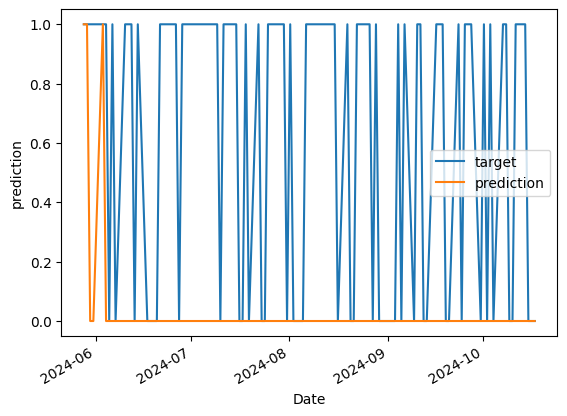

In [19]:
pred_res.plot(ylabel="prediction")
plt.legend(["target", "prediction"]);

In [20]:
preds.tail()

,Next day prediction
Date,
2024-10-11 06:00:00+02:00,0
2024-10-14 06:00:00+02:00,0
2024-10-15 06:00:00+02:00,0
2024-10-16 06:00:00+02:00,0
2024-10-17 06:00:00+02:00,0


The Prediction is of the next trading day.

1 means the price is predicted to go up.
0 means the price is predicted to go down.